In [6]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

## Study of latency and bandwidth with UCX on EPYC

In [9]:
raw_data = []

csv_files = glob.glob('*.csv')

for file in csv_files:

    df = pd.read_csv(file, skiprows=[1], header=0)

    raw_data.append(df)

data_temp = pd.concat(raw_data)

data = data_temp.groupby('Message_size', as_index=False).agg({
    'Avg_latency': 'mean',
    'Bandwidth': 'mean'
})

data['Time_comm'] = (data['Avg_latency'] / 10**6) + (data['Message_size'] / (data['Bandwidth']*10**6))

print(data)
#data.to_csv('data_latency_epyc.csv', index=False)

    Message_size  Avg_latency     Bandwidth     Time_comm
0              1     0.302381     13.974286  3.739410e-07
1              2     0.300000     28.282381  3.707154e-07
2              4     0.290952     56.087143  3.622700e-07
3              8     0.298095    115.069048  3.676187e-07
4             16     0.300476    227.084762  3.709345e-07
5             32     0.376667    462.248571  4.458935e-07
6             64     0.374286    880.813810  4.469458e-07
7            128     0.420952   1259.829524  5.225534e-07
8            256     0.432857   2454.901429  5.371383e-07
9            512     0.473333   4593.449524  5.847964e-07
10          1024     0.600476   8405.376667  7.223030e-07
11          2048     0.870952  12258.762381  1.038017e-06
12          4096     1.205238  15772.241429  1.464935e-06
13          8192     1.950476  20480.515714  2.350466e-06
14         16384     3.143333   9577.419048  4.854024e-06
15         32768     5.465714  10380.655714  8.622355e-06
16         655

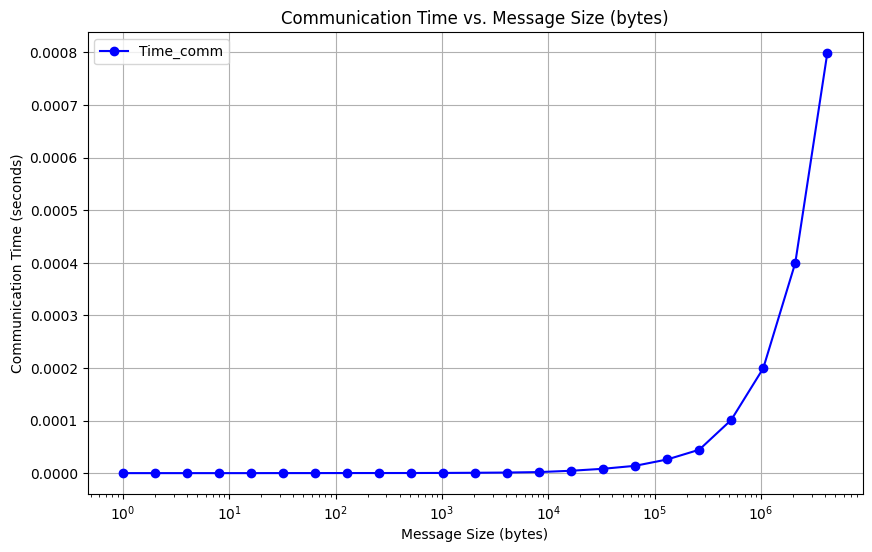

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data['Message_size'], data['Time_comm'], marker='o', linestyle='-', color='b', label='Time_comm')
plt.xscale('log')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Communication Time (seconds)')
plt.title('Communication Time vs. Message Size (bytes)')
plt.legend()
plt.grid(True)
plt.show()